# Hospital admission prediction

In [362]:
import pandas as pd
import collections
import sklearn
import numpy as np
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestRegressor
from operator import itemgetter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

## 1.load data

In [67]:
data = pd.read_csv("data/synthetic_hospital_data.csv")
diag_code = pd.read_csv("data/synth-hospital-codebook-diag.csv")
spec_code = pd.read_csv("data/synth-hospital-codebook-spec.csv")
sigfac_code = pd.read_csv("data/synth-hospital-codebook-sigfac.csv")
admission_code = pd.read_csv("data/synth-hospital-codebook-admission.csv")

## 2. view of codebook

### 2.1diagnosis

In [53]:
diag_code.head(5)

,ICD10code,Diagnosisname,Unnamed: 2,Unnamed: 3
0,A00,Cholera,NaN,NaN
1,A01,Typhoid and paratyphoid fevers,NaN,NaN
2,A02,Other salmonella infections,NaN,NaN
3,A03,Shigellosis,NaN,NaN
4,A04,Other bacterial intestinal infections,NaN,NaN


In [54]:
diag_code.drop(diag_code.columns[[2,3]],axis = 1)

,ICD10code,Diagnosisname
0,A00,Cholera
1,A01,Typhoid and paratyphoid fevers
2,A02,Other salmonella infections
3,A03,Shigellosis
4,A04,Other bacterial intestinal infections
5,A05,Other bacterial foodborne intoxications
6,A06,Amoebiasis
7,A07,Other protozoal intestinal diseases
8,A08,Viral and other specified intestinal infections
9,A09,Diarrhoea and gastroenteritis of presumed infe...


### 2.2 specialties

In [55]:
spec_code.drop([0])

,SMR Specialties,Unnamed: 1
1,A1,General Medicine
2,A2,Cardiology
3,A3,Clinical Genetics
4,A6,Communicable Diseases
5,A7,Dermatology
6,A8,Endocrinology
7,A9,Gastroenterology
8,AA,Genito-Urinary Medicine
9,AB,Geriatric Medicine
10,AC,Homoeopathy


In [57]:
sigfac_code.drop([0])

,SMR Significant facilities,Unnamed: 1
1,11,Other (inc. the Clinical Facilities of Standa...
2,13,Intensive Care Unit
3,14,Cardiac Care Unit
4,16,Children's Unit
5,17,Accident & Emergency (A&E) Ward
6,18,Ward for Younger Physically Disabled
7,19,Spinal Unit
8,1A,Geriatric Orthopaedic Rehabilitation Unit (GORU)
9,1B,Rehabilitation Ward (except GORU)
10,1C,Burns Unit


### 2.3 admission type

In [68]:
admission_code.dropna(axis=0,how = 'all')

,SMR Admission Type,Unnamed: 1
1,NaN,Emergency Admission
2,30.0,"Emergency Admission, no additional detail added"
3,31.0,Patient Injury - Self Inflicted (Injury or Poi...
4,32.0,Patient Injury - Road Traffic Accident (RTA)
5,33.0,Patient Injury - Home Incident (including Assa...
6,34.0,Patient Injury - Incident at Work (including A...
7,35.0,Patient Injury - Other Injury (inc. Accidental...
8,36.0,"Patient Non-Injury (e.g. stroke, MI, Ruptured ..."
9,38.0,Other Emergency Admission (including emergency...
10,39.0,"Emergency Admission, type not known"


## 3.summary of synthetic hospital dataset

In [77]:
data.sample(100)

,flag,fake_doa,fake_doa2,fake_age,fake_cis,fake_spec,fake_shortdiag,fake_sex,fake_marital,fake_ipdc,fake_sigfac,fake_wait,fake_admission,fake_los,Fakename
2408,fake_data,01/03/0013,130301,0,5,A9,P38,1,1,I,11,8,30,1,Pansy_hospital
1183,fake_data,06/02/0007,70206,1,1,AF,J06,2,1,I,16,8,18,1,Smith's_hospital
108,fake_data,07/06/0001,10607,43,2,C11,I83,1,1,D,11,1,11,0,Flag_hospital
1114,fake_data,28/09/0006,60928,3,1,D1,K02,1,1,D,11,1,18,0,Fescue_hospital
700,fake_data,23/05/0004,40523,85,17,AB,I25,1,2,I,11,8,36,1,Hawkweed_hospital
1857,fake_data,23/06/0010,100623,16,1,C9,D22,2,1,D,11,1,18,0,Hawkweed_hospital
2726,fake_data,27/08/0014,140827,62,3,C11,S01,2,9,I,11,1,11,0,Ryegrass_hospital
3124,fake_data,23/05/0016,160523,64,4,C1,D12,2,9,I,11,1,11,0,Rhododendron_hospital
1417,fake_data,24/05/0008,80524,48,9,F2,N84,2,1,D,11,1,11,0,Mouse-ear_hospital
913,fake_data,23/08/0005,50823,5,2,D3,K02,1,1,I,11,8,36,0,Mouse-ear_hospital


In [76]:
data.describe()

,fake_doa2,fake_age,fake_cis,fake_sex,fake_marital,fake_wait,fake_admission,fake_los
count,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000
mean,92880.093418,43.770336,4.215579,1.520552,3.957459,4.849382,22.137971,2.840471
std,49501.217614,25.518045,4.740607,0.499649,3.480980,3.474671,11.636133,7.685795
min,10107.000000,0.000000,1.000000,1.000000,1.000000,1.000000,10.000000,0.000000
25%,50566.500000,23.000000,1.000000,1.000000,1.000000,1.000000,11.000000,0.000000
50%,91218.000000,45.000000,3.000000,2.000000,2.000000,8.000000,18.000000,1.000000
75%,140166.000000,65.000000,5.000000,2.000000,9.000000,8.000000,36.000000,2.000000
max,171230.000000,85.000000,56.000000,2.000000,9.000000,9.000000,39.000000,93.000000


## 4.visualization

§ some plots and charts are made by Excal without python code

### 4.1 ratio of gender/marital/ipdc/wait

In [94]:
sex_ratio = collections.Counter(data["fake_sex"].values)
print(sex_ratio)
marital_ratio = collections.Counter(data["fake_marital"].values)
print(marital_ratio)
ipdc_ratio = collections.Counter(data["fake_ipdc"].values)
print(ipdc_ratio)
wait_ratio = collections.Counter(data["fake_wait"].values)
print(wait_ratio)

# pie plots are drawn using excel

Counter({2: 1811, 1: 1668})
Counter({1: 1187, 9: 1030, 2: 980, 3: 181, 8: 101})
Counter({'I': 2349, 'D': 1130})
Counter({8: 1859, 1: 1500, 2: 83, 9: 37})


### 4.2 density of age/cis/length_of_stay

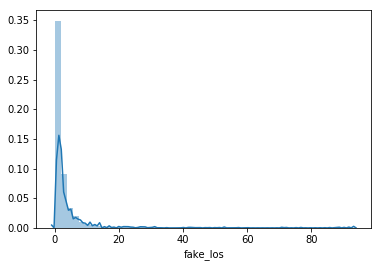

In [366]:
# density plot
sns.distplot(data["fake_los"], kde=True)

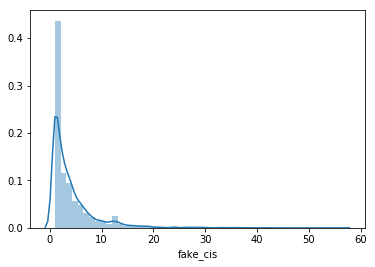

In [365]:
sns.distplot(data["fake_cis"], kde=True)

### 4.3 violin plots for age and sex with cis/length_of_stay

In [115]:
data["fake_age_group"] = data.apply(lambda x: 
                                    "0-15" if x.fake_age<=15
                                    else ("16-24" if x.fake_age>=16 and x.fake_age<=24 
                                          else ("25-34" if x.fake_age>=25 and x.fake_age<=34
                                               else ("35-44" if x.fake_age>=35 and x.fake_age<=44
                                                    else ("45-54" if x.fake_age>=45 and x.fake_age<=54
                                                         else ("55-64" if x.fake_age>=55 and x.fake_age<=64
                                                              else ("65-74" if x.fake_age>=65 and x.fake_age<=74
                                                                   else ("75-84" if x.fake_age>=75 and x.fake_age<=84
                                                                        else "85+"))))))), 
                                    axis=1)

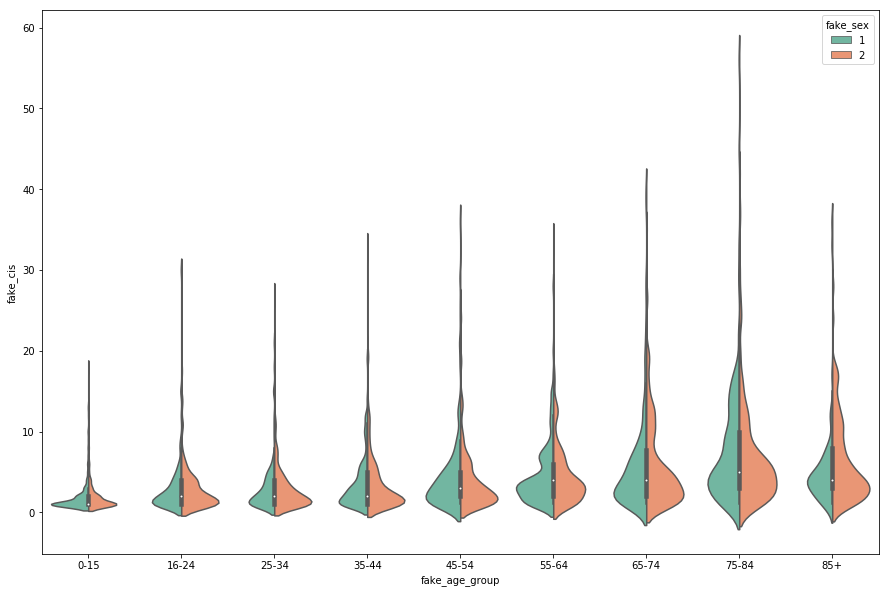

In [124]:
order = ["0-15","16-24","25-34","35-44","45-54","55-64","65-74","75-84","85+"]
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax = sns.violinplot(x="fake_age_group", y="fake_cis",hue="fake_sex",data=data, order=order,
                    palette="Set2", split=True, scale="count", bw=0.2)

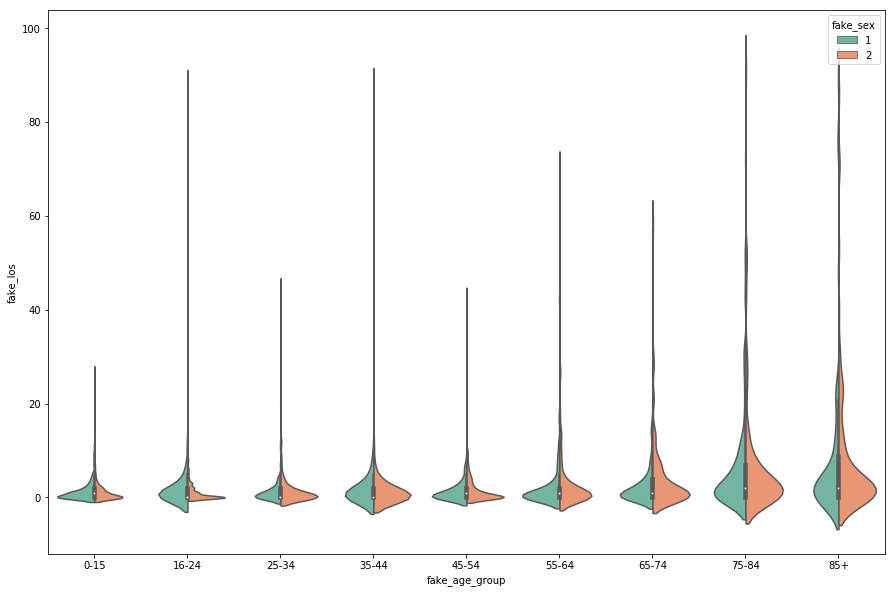

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax = sns.violinplot(x="fake_age_group", y="fake_los",hue="fake_sex",data=data, order=order,
                    palette="Set2", split=True, scale="count", bw=0.2)

### 4.4 bar chart for age and sex with ipdc/admission_type

In [203]:
data["fake_admission_group"] = data.apply(lambda x:
                                         "Routine Admission" if x.fake_admission<20
                                         else ("Urgent Admission" if x.fake_admission >=20 and x.fake_admission <30
                                              else "Emergency Admission"), axis=1)

# charts are made by excel

## 5. prediction of admission type

### 5.1 pre processing

In [234]:
label = data.apply(lambda x: 0 if x.fake_admission_group == "Routine Admission" 
                   else (1 if x.fake_admission_group == "Emergency Admission"
                         else 2), axis=1)

In [235]:
features = data[["fake_age","fake_cis","fake_sex","fake_wait"]]
features["fake_sex"][features["fake_sex"] ==1] = 0
features["fake_sex"][features["fake_sex"] ==2] = 1

/Users/lipeijia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/lipeijia/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [236]:
features["fake_wait"].astype('category')
one_hot = pd.get_dummies(features["fake_wait"],sparse=True)
features = features.drop("fake_wait",axis=1)
features = features.join(one_hot)

In [237]:
features

,fake_age,fake_cis,fake_sex,1,2,8,9
0,62,7,0,1,0,0,0
1,85,9,1,0,0,1,0
2,16,1,0,1,0,0,0
3,85,1,1,1,0,0,0
4,0,1,0,0,0,1,0
5,85,6,1,0,0,1,0
6,25,2,0,1,0,0,0
7,53,2,1,1,0,0,0
8,33,2,0,1,0,0,0
9,68,6,1,1,0,0,0


### 5.2 deal with imbalanced dataset

In [238]:
print('Original dataset shape %s' % collections.Counter(label))
dict_res = {
    0:1966,
    1:1508,
    2:983
}
sm = SMOTE(sampling_strategy=dict_res, random_state=42, k_neighbors=3)
feature_res, label_res = sm.fit_resample(features.values, label)
print('Resampled dataset shape %s' % collections.Counter(label_res))

Original dataset shape Counter({0: 1966, 1: 1508, 2: 5})
Resampled dataset shape Counter({0: 1966, 1: 1508, 2: 983})


### 5.3 split dataset into train and test

In [367]:
train_features, test_features, train_labels, test_labels = train_test_split(feature_res, label_res, 
                                                                            test_size=0.33, random_state=233)
print(train_features.shape)
print(test_features.shape)

(2986, 7)
(1471, 7)


### 5.4 models

#### 5.4.1 naive bayes

In [240]:
gnb = GaussianNB()
y_pred = gnb.fit(train_features, train_labels).predict(test_features)
print("Number of mislabeled points out of a total %d points : %d" 
      % (test_features.shape[0],(test_labels != y_pred).sum()))

Number of mislabeled points out of a total 1471 points : 362


#### 5.4.2 GBDT

In [241]:
gbdt = GradientBoostingClassifier(
                learning_rate=0.01, 
                min_samples_split=2,
                max_features='sqrt',
                n_estimators=3000,
                min_samples_leaf=1,
                subsample=0.2,
                max_depth=4,
            )
y_pred_gbdt = gbdt.fit(train_features,train_labels).predict(test_features)
print("Number of mislabeled points out of a total %d points : %d" 
      % (test_features.shape[0],(test_labels != y_pred_gbdt).sum()))

Number of mislabeled points out of a total 1471 points : 127


#### 5.4.3 softmax

In [263]:
class Softmax:
    def __init__(self, batch_size=50, epochs=1000, learning_rate=1e-2, reg_strength=1e-5, weight_update='adam'):
        self.W = None
        self.batch_size = batch_size
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.reg_strength = reg_strength
        self.weight_update = weight_update

    def train(self, X, y):
        n_features = X.shape[1]
        n_classes = y.max() + 1
        self.W = np.random.randn(n_features, n_classes) / np.sqrt(n_features/2)
        config = {'reg_strength': self.reg_strength, 'batch_size': self.batch_size,
                'learning_rate': self.learning_rate, 'eps': 1e-8, 'decay_rate': 0.99,
                'momentum': 0.9, 'cache': None, 'beta_1': 0.9, 'beta_2':0.999,
                'velocity': np.zeros(self.W.shape)}
        c = globals()['Softmax']
        for epoch in range(self.epochs):
            loss, config = getattr(c, self.weight_update)(self, X, y, config)
            # print("Epoch: %s, Loss: %s" % (epoch, loss))

    def predict(self, X):
        return np.argmax(X.dot(self.W), 1)

    def loss(self, X, y, W, b, reg_strength):
        sample_size = X.shape[0]
        predictions = X.dot(W) + b

        # Fix numerical instability
        predictions -= predictions.max(axis=1).reshape([-1, 1])

        # Run predictions through softmax
        softmax = math.e**predictions
        softmax /= softmax.sum(axis=1).reshape([-1, 1])

        # Cross entropy loss
        loss = -np.log(softmax[np.arange(len(softmax)), y]).sum() 
        loss /= sample_size
        loss += 0.5 * reg_strength * (W**2).sum()

        softmax[np.arange(len(softmax)), y] -= 1
        dW = (X.T.dot(softmax) / sample_size) + (reg_strength * W)
        return loss, dW

    def sgd(self, X, y, config):
        items = itemgetter('learning_rate', 'batch_size', 'reg_strength')(config)
        learning_rate, batch_size, reg_strength = items

        loss, dW = self.sample_and_calculate_gradient(X, y, batch_size, self.W, 0, reg_strength)
 
        self.W -= learning_rate * dW
        return loss, config

    def sgd_with_momentum(self, X, y, config):
        items = itemgetter('learning_rate', 'batch_size', 'reg_strength', 'momentum')(config)
        learning_rate, batch_size, reg_strength, momentum = items

        loss, dW = self.sample_and_calculate_gradient(X, y, batch_size, self.W, 0, reg_strength)

        config['velocity'] = momentum*config['velocity'] - learning_rate*dW
        self.W += config['velocity']
        return loss, config

    def rms_prop(self, X, y, config):
        items = itemgetter('learning_rate', 'batch_size', 'reg_strength', 'decay_rate', 'eps', 'cache')(config)
        learning_rate, batch_size, reg_strength, decay_rate, eps, cache = items

        loss, dW = self.sample_and_calculate_gradient(X, y, batch_size, self.W, 0, reg_strength)

        cache = np.zeros(dW.shape) if cache == None else cache
        cache = decay_rate * cache + (1-decay_rate) * dW**2
        config['cache'] = cache

        self.W -= learning_rate * dW / (np.sqrt(cache) + eps)
        return loss, config

    def adam(self, X, y, config):
        items = itemgetter('learning_rate', 'batch_size', 'reg_strength', 'eps', 'beta_1', 'beta_2')(config)
        learning_rate, batch_size, reg_strength, eps, beta_1, beta_2 = items
        config.setdefault('t', 0)
        config.setdefault('m', np.zeros(self.W.shape))
        config.setdefault('v', np.zeros(self.W.shape))

        loss, dW = self.sample_and_calculate_gradient(X, y, batch_size, self.W, 0, reg_strength)

        config['t'] += 1
        config['m'] = config['m']*beta_1 + (1-beta_1)*dW
        config['v'] = config['v']*beta_2 + (1-beta_2)*dW**2
        m = config['m']/(1-beta_1**config['t'])
        v = config['v']/(1-beta_2**config['t'])
        self.W -= learning_rate*m/(np.sqrt(v)+eps)
        return loss, config

    def sample_and_calculate_gradient(self, X, y, batch_size, w, b, reg_strength):
        random_indices = random.sample(range(X.shape[0]), batch_size)
        X_batch = X[random_indices]
        y_batch = y[random_indices]
        return self.loss(X_batch, y_batch, w, b, reg_strength)

In [277]:
reg_strength = 1e-4
batch_size = 50
epochs = 10000
learning_rate = 5e-1
weight_update = 'adam'
sm1 = Softmax(batch_size=batch_size, epochs=epochs, learning_rate=learning_rate, 
              reg_strength=reg_strength, weight_update=weight_update)
sm1.train(train_features, train_labels)
pred = sm1.predict(test_features)
print("Number of mislabeled points out of a total %d points : %d" 
      % (test_features.shape[0],(test_labels != pred).sum()))

Number of mislabeled points out of a total 1471 points : 417


## 6 prediction of length of stay

### 6.1 pre processing

In [348]:
label_los = data["fake_los"]
label_los_log = np.log1p(label_los)

In [339]:
features_los = data[["fake_age","fake_cis","fake_sex","fake_wait","fake_ipdc","fake_admission",
                     "fake_spec","fake_shortdiag","fake_sigfac"]]

In [340]:
features_los["fake_sex"][features_los["fake_sex"] ==1] = 0
features_los["fake_sex"][features_los["fake_sex"] ==2] = 1
features_los["fake_ipdc"][features_los["fake_ipdc"] =="I"] = 0
features_los["fake_ipdc"][features_los["fake_ipdc"] =="D"] = 1

/Users/lipeijia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/lipeijia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/lipeijia/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, sel

In [341]:
features_los["fake_admission_group"] = features_los.apply(lambda x:
                                         "Routine Admission" if x.fake_admission<20
                                         else ("Urgent Admission" if x.fake_admission >=20 and x.fake_admission <30
                                              else "Emergency Admission"), axis=1)
features_los = features_los.drop("fake_admission",axis=1)

/Users/lipeijia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [342]:
fake_diag_froup = pd.read_csv("data/fake_diag_group.csv")

In [343]:
features_los = features_los.join(fake_diag_froup)
features_los = features_los.drop("fake_shortdiag",axis=1)

In [344]:
catagory_columns = ["fake_spec","fake_sigfac","fake_admission_group","fake_diag_group"]
features_los[catagory_columns].astype('category')
one_hot_los = pd.get_dummies(features_los[catagory_columns],sparse=True)
features_los = features_los.drop(catagory_columns,axis=1)
features_los = features_los.join(one_hot_los)

In [346]:
features_los["fake_wait"].astype('category')
one_hot_wait = pd.get_dummies(features_los["fake_wait"],sparse=True)
features_los = features_los.drop("fake_wait",axis=1)
features_los = features_los.join(one_hot_wait)

### 6.2 split dataset

In [349]:
train_features_los, test_features_los, train_labels_los, test_labels_los = train_test_split(features_los, 
                                                                                            label_los_log, 
                                                                            test_size=0.33, random_state=233)
print(train_features_los.shape)
print(train_features_los.shape)

(2330, 88)
(2330, 88)


### 6.3 models

#### 6.3.1 linear regression

In [352]:
reg = LinearRegression().fit(train_features_los, train_labels_los)
y_pred_lr_train = reg.predict(train_features_los)
y_pred_lr_test = reg.predict(test_features_los)
rmse_lr_trian = np.sqrt(mean_squared_error(train_labels_los, y_pred_lr_train))
rmse_lr_test = np.sqrt(mean_squared_error(test_labels_los, y_pred_lr_test))
print(rmse_lr_trian, rmse_lr_test)

0.6802236687260413 0.7327446639654471


#### 6.3.2 SVR

In [353]:


svr = SVR(kernel='rbf', C=100, gamma=0.0008,epsilon=0.001).fit(train_features_los, train_labels_los)
y_pred_svr_train = svr.predict(train_features_los)
y_pred_svr_test = svr.predict(test_features_los)
rmse_svr_trian = np.sqrt(mean_squared_error(train_labels_los, y_pred_svr_train))
rmse_svr_test = np.sqrt(mean_squared_error(test_labels_los, y_pred_svr_test))
print(rmse_svr_trian, rmse_svr_test)

0.6800463257185031 0.7158159946125605


#### 6.3.3 randam forest

In [359]:
rf = RandomForestRegressor(n_estimators=40).fit(train_features_los, train_labels_los)
y_pred_rf_train = rf.predict(train_features_los)
y_pred_rf_test = rf.predict(test_features_los)
rmse_rf_train = np.sqrt(mean_squared_error(train_labels_los, y_pred_rf_train))
rmse_rf_test = np.sqrt(mean_squared_error(test_labels_los, y_pred_rf_test))
print(rmse_rf_train, rmse_rf_test)

0.2911320366839985 0.7552420791568571
